In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel('/content/Sample Data for shortlisting.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   S. No.                                              810 non-null    int64 
 1   City                                                810 non-null    object
 2   Gender                                              810 non-null    object
 3   Marital Status                                      810 non-null    object
 4   Age                                                 810 non-null    object
 5   Education                                           810 non-null    object
 6   Role                                                810 non-null    object
 7   Number of investors in family                       810 non-null    int64 
 8   Household Income                                    810 non-null    object
 9   Percentage

In [ ]:
data.shape

(810, 19)

In [ ]:
data.isnull().sum()

S. No.                                                0
City                                                  0
Gender                                                0
Marital Status                                        0
Age                                                   0
Education                                             0
Role                                                  0
Number of investors in family                         0
Household Income                                      0
Percentage of Investment                              0
Source of Awareness about Investment                  0
Knowledge level about different investment product    0
Knowledge level about sharemarket                     0
Knowledge about Govt. Schemes                         0
Investment Influencer                                 0
Investment Experience                                 0
Risk Level                                            0
Return Earned                                   

In [ ]:
data

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,1,New York,Men,Never Married,Early Working,Secondary,Marketing and Sales Executive,2,US$ 2736 to US$ 8205,Don't Want to Reveal,Television,7,9,4,Family Reference,Less Than 1 Year,Low,Negative Return,Tax
1,2,New York,Women,Married,Early Working,Middle,Advertising and Promotion Executive,2,US$ 19146 to US$ 24615,Don't Want to Reveal,Workers,7,5,2,Workers Reference,Less Than 1 Year,Low,10 to 12,Others
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,806,Seattle,Men,Married,Early Working,Secondary,Top Executives,1,US$ 2735,Don't Want to Reveal,Friends,2,3,1,Intermediaries,7 Years to 9 Years,Medium,10 to 12,Return
806,807,Seattle,Men,Never Married,Children,Secondary,Top Executives,4,Above US$ 30086,11% to 15%,Magazine,1,9,3,Workers Reference,7 Years to 9 Years,Low,Negative Return,Inflation
807,808,San Francisco,Men,Never Married,Children,Uneducated,Advertising and Promotion Executive,1,US$ 13676 to US$ 19145,11% to 15%,Others,1,5,5,Social Media,Less Than 1 Year,High,10 to 12,Tax
808,809,Memphis,Women,Married,Children,Uneducated,Marketing and Sales Executive,3,US$ 19146 to US$ 24615,16% to 20%,Workers,6,5,2,Social Media,1 Year to 3 Years,High,Negative Return,Return


In [ ]:
for i in data.columns:
  print(len(data[i].value_counts()))

810
5
2
2
5
5
5
5
7
7
7
10
10
6
7
5
3
6
6


In [ ]:
label_encoder = LabelEncoder()
data= data.apply(label_encoder.fit_transform)

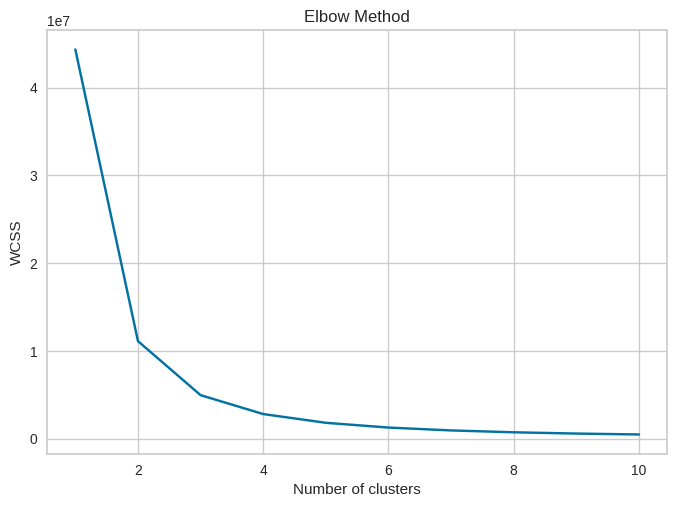

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X=data

# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=10000, n_init=100, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=413158fae50c45b408f3ebb5468439c93a7a2ceedd41dac0ec0739de3cafb87e
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
import numpy as np

# Assuming you have already calculated the optimal k value using the elbow method and stored it in 'optimal_k'

# Create K-medoids object with optimal k value
initial_medoids = np.random.randint(0, len(X), 2)
kmedoids_instance = kmedoids(X, initial_medoids)

# Run cluster analysis and get results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Assign cluster labels to data points
cluster_labels = np.zeros(len(X))
for i, cluster in enumerate(clusters):
    cluster_labels[cluster] = i

# Add cluster labels to your dataframe or data structure for further analysis
data['cluster'] = cluster_labels


ValueError: Length of values (300) does not match length of index (810)

In [ ]:
data.shape

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
import numpy as np

# Assuming you have already calculated the optimal k value using the elbow method and stored it in 'optimal_k'

# Create K-medoids object with optimal k value
initial_medoids = np.random.randint(0, len(X), 2)
kmedoids_instance = kmedoids(X, initial_medoids)

# Run cluster analysis and get results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()
print(len(clusters[0]))
# Create an array to store cluster labels for each data point
cluster_labels = np.zeros(len(X), dtype=int)

# Assign cluster labels to data points
for i, cluster in enumerate(clusters):
    cluster_labels[cluster] = i

# Add cluster labels to the dataframe
data['cluster'] = cluster_labels


225


ValueError: Length of values (300) does not match length of index (810)

In [ ]:
from sklearn.cluster import KMeans

# Assuming you have already calculated the optimal k value using the elbow method and stored it in 'optimal_k'

# Create KMeans object with optimal k value
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit KMeans clustering model to your data
kmeans.fit(X)  # Assuming X is your feature matrix

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your dataframe or data structure for further analysis
data['cluster'] = cluster_labels


ValueError: Length of values (300) does not match length of index (810)

In [ ]:
from pycaret.clustering import *
s = setup(data, session_id = 123)
kmeans = create_model(kmeans)
evaluate_model(kmeans)

,Description,Value
0,Session id,123
1,Original data shape,"(810, 19)"
2,Transformed data shape,"(810, 19)"
3,Numeric features,19
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5615,3966.4548,0.5099,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from sklearn_extra.cluster import KMedoids

# Assuming you have already calculated the optimal k value using the elbow method and stored it in 'optimal_k'

# Create KMedoids object with optimal k value
kmedoids = KMedoids()

# Fit KMedoids clustering model to your data
kmedoids.fit(X)  # Assuming X is your feature matrix

# Get cluster labels for each data point
cluster_labels = kmedoids.labels_

# Add cluster labels to your dataframe or data structure for further analysis
data['cluster'] = cluster_labels


ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
['S. No.', 'City', 'Gender', 'Marital Status', 'Age', 'Education',
       'Role', 'Number of investors in family', 'Household Income',
       'Percentage of Investment', 'Source of Awareness about Investment',
       'Knowledge level about different investment product',
       'Knowledge level about sharemarket', 'Knowledge about Govt. Schemes',
       'Investment Influencer', 'Investment Experience', 'Risk Level',
       'Return Earned', 'Reason for Investment']

['S. No.',
 'City',
 'Gender',
 'Marital Status',
 'Age',
 'Education',
 'Role',
 'Number of investors in family',
 'Household Income',
 'Percentage of Investment',
 'Source of Awareness about Investment',
 'Knowledge level about different investment product',
 'Knowledge level about sharemarket',
 'Knowledge about Govt. Schemes',
 'Investment Influencer',
 'Investment Experience',
 'Risk Level',
 'Return Earned',
 'Reason for Investment']

In [ ]:
data

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
0,0,2,0,1,1,2,2,1,1,5,5,6,8,3,0,4,1,5,5
1,1,2,1,0,1,0,0,1,4,5,6,6,4,1,6,4,1,1,2
2,2,4,1,0,1,3,4,1,1,4,0,3,2,1,1,3,1,0,3
3,3,3,0,1,2,4,4,4,4,1,0,4,0,2,1,2,1,1,5
4,4,3,0,0,4,1,1,1,3,1,6,5,9,4,0,3,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,805,4,0,0,1,2,3,0,0,5,2,1,2,0,3,2,2,1,3
806,806,4,0,1,0,2,3,3,6,0,3,0,8,2,6,2,1,5,1
807,807,3,0,1,0,4,0,0,3,0,4,0,4,4,5,4,0,1,5
808,808,1,1,0,0,4,2,2,4,1,6,5,4,1,5,0,0,5,3


In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
from pycaret.anomaly import *

# Load data
anomaly_setup = setup(data, normalize=True, session_id=123)



,Description,Value
0,Session id,123
1,Original data shape,"(810, 19)"
2,Transformed data shape,"(810, 75)"
3,Numeric features,5
4,Categorical features,14
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
iforest_model = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plot_model(iforest_model)

In [ ]:
predictions = predict_model(iforest_model, data=data)

In [ ]:
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [ ]:
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [ ]:
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(810, 19)"
2,Transformed data shape,"(810, 75)"
3,Numeric features,5
4,Categorical features,14
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [ ]:
create_model('model_ID')

ValueError: Estimator model_ID not available. Please see docstring for list of available estimators.

In [ ]:
from pycaret.anomaly import get_available_estimators

available_estimators = get_available_estimators()
print(available_estimators)


In [ ]:
# train kmeans model
kmeans = create_model('kmeans')

In [ ]:
data['Percentage of Investment'].value_counts()

Percentage of Investment
Above 26%               130
Upto 5%                 122
6% to 10%               122
21% to 25%              117
11% to 15%              113
Don't Want to Reveal    104
16% to 20%              102
Name: count, dtype: int64

In [ ]:
filtered_df = data[data['Percentage of Investment'] != "Don't Want to Reveal"]

In [ ]:
filtered_df

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
2,3,Seattle,Women,Married,Early Working,Teritary,Training and Development Executive,2,US$ 2736 to US$ 8205,Above 26%,Family,4,3,2,Friends Reference,Above 9 Years,Low,1 to 4,Return
3,4,San Francisco,Men,Never Married,Elderly,Uneducated,Training and Development Executive,5,US$ 19146 to US$ 24615,16% to 20%,Family,5,1,3,Friends Reference,7 Years to 9 Years,Low,10 to 12,Tax
4,5,San Francisco,Men,Married,Prime Working,Primary,Computer and Information System Executive,2,US$ 13676 to US$ 19145,16% to 20%,Workers,6,10,5,Family Reference,Above 9 Years,Low,5 to 6,Fun and Exitement
5,6,Memphis,Women,Never Married,Prime Working,Primary,Marketing and Sales Executive,5,US$ 19146 to US$ 24615,21% to 25%,Magazine,3,9,1,Institutions,Less Than 1 Year,High,Negative Return,Status
6,7,Seattle,Women,Never Married,Prime Working,Teritary,Training and Development Executive,5,US$ 19146 to US$ 24615,Upto 5%,Magazine,6,4,4,Others,1 Year to 3 Years,Low,Negative Return,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,805,Seattle,Women,Married,Prime Working,Uneducated,Top Executives,4,Above US$ 30086,Upto 5%,Friends,1,5,5,Others,1 Year to 3 Years,High,Negative Return,Return
806,807,Seattle,Men,Never Married,Children,Secondary,Top Executives,4,Above US$ 30086,11% to 15%,Magazine,1,9,3,Workers Reference,7 Years to 9 Years,Low,Negative Return,Inflation
807,808,San Francisco,Men,Never Married,Children,Uneducated,Advertising and Promotion Executive,1,US$ 13676 to US$ 19145,11% to 15%,Others,1,5,5,Social Media,Less Than 1 Year,High,10 to 12,Tax
808,809,Memphis,Women,Married,Children,Uneducated,Marketing and Sales Executive,3,US$ 19146 to US$ 24615,16% to 20%,Workers,6,5,2,Social Media,1 Year to 3 Years,High,Negative Return,Return


In [ ]:
X=filtered_df.drop('Percentage of Investment',axis=1)

In [ ]:
y=filtered_df['Percentage of Investment']

In [ ]:
X

In [ ]:
y

In [ ]:
filtered_df= filtered_df.apply(label_encoder.fit_transform)
X=filtered_df.drop('Percentage of Investment',axis=1)
y=filtered_df['Percentage of Investment']

In [ ]:
filtered_df

,S. No.,City,Gender,Marital Status,Age,Education,Role,Number of investors in family,Household Income,Percentage of Investment,Source of Awareness about Investment,Knowledge level about different investment product,Knowledge level about sharemarket,Knowledge about Govt. Schemes,Investment Influencer,Investment Experience,Risk Level,Return Earned,Reason for Investment
2,0,4,1,0,1,3,4,1,5,4,0,3,2,1,1,3,1,0,3
3,1,3,0,1,2,4,4,4,2,1,0,4,0,2,1,2,1,1,5
4,2,3,0,0,4,1,1,1,1,1,6,5,9,4,0,3,1,2,0
5,3,1,1,1,4,1,2,4,2,2,3,2,8,0,2,4,0,5,4
6,4,4,1,1,4,3,4,4,2,5,3,5,3,3,4,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,701,4,1,0,4,4,3,3,0,5,2,0,4,4,4,0,0,5,3
806,702,4,0,1,0,2,3,3,0,0,3,0,8,2,6,2,1,5,1
807,703,3,0,1,0,4,0,0,1,0,4,0,4,4,5,4,0,1,5
808,704,1,1,0,0,4,2,2,2,1,6,5,4,1,5,0,0,5,3


In [ ]:
X = data[['Reason for Investment', 'Risk Level', 'Household Income',
          'Source of Awareness about Investment', 'Knowledge level about sharemarket',
          'Investment Influencer','Percentage of Investment']]

In [ ]:
# Function to calculate average income from range
def calculate_average_income(range_str):
    if ' to ' in range_str:
        range_values = range_str.split(' to ')
        return (int(range_values[0].replace('US$ ', '').replace(',', '')) + int(range_values[1].replace('US$ ', '').replace(',', ''))) / 2
    elif range_str.startswith('Above US$'):
        return int(range_str.replace('Above US$ ', '').replace(',', ''))
    else:
        return int(range_str.replace('US$ ', '').replace(',', ''))

# Apply the function to the 'Household Income' column
data['Household Income'] = data['Household Income'].apply(calculate_average_income)


In [ ]:
X

,Reason for Investment,Risk Level,Household Income,Source of Awareness about Investment,Knowledge level about sharemarket,Investment Influencer,Percentage of Investment
0,Tax,Low,5470.5,Television,9,Family Reference,Don't Want to Reveal
1,Others,Low,21880.5,Workers,5,Workers Reference,Don't Want to Reveal
2,Return,Low,5470.5,Family,3,Friends Reference,Above 26%
3,Tax,Low,21880.5,Family,1,Friends Reference,16% to 20%
4,Fun and Exitement,Low,16410.5,Workers,10,Family Reference,16% to 20%
...,...,...,...,...,...,...,...
805,Return,Medium,2735.0,Friends,3,Intermediaries,Don't Want to Reveal
806,Inflation,Low,30086.0,Magazine,9,Workers Reference,11% to 15%
807,Tax,High,16410.5,Others,5,Social Media,11% to 15%
808,Return,High,21880.5,Workers,5,Social Media,16% to 20%


In [ ]:
filtered_df

,Reason for Investment,Risk Level,Household Income,Source of Awareness about Investment,Knowledge level about sharemarket,Investment Influencer,Percentage of Investment
0,5,1,1,5,8,0,5
1,2,1,4,6,4,6,5
2,3,1,1,0,2,1,4
3,5,1,4,0,0,1,1
4,0,1,3,6,9,0,1
...,...,...,...,...,...,...,...
805,3,2,0,2,2,3,5
806,1,1,6,3,8,6,0
807,5,0,3,4,4,5,0
808,3,0,4,6,4,5,1


In [ ]:
label_encoder = LabelEncoder()
filtered_df= X.apply(label_encoder.fit_transform)
X=filtered_df.drop('Percentage of Investment',axis=1)
y=filtered_df['Percentage of Investment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Assuming X contains your features and y contains your target variable
# X should be a 2D array or DataFrame, y should be a 1D array or Series

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train various supervised learning models

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("\nSupport Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

# k-Nearest Neighbors (kNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("\nk-Nearest Neighbors Accuracy:", knn_accuracy)
print("k-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.12962962962962962
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.16      0.18        25
           1       0.20      0.09      0.12        22
           2       0.00      0.00      0.00        23
           3       0.19      0.30      0.24        23
           4       0.09      0.17      0.11        24
           5       0.14      0.20      0.16        15
           6       0.08      0.03      0.05        30

    accuracy                           0.13       162
   macro avg       0.13      0.14      0.12       162
weighted avg       0.13      0.13      0.12       162


Decision Tree Accuracy: 0.1419753086419753
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.08      0.08        25
           1       0.14      0.14      0.14        22
           2       0.17      0.13      0.15        23
           3

In [ ]:
"""import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

label_encoder = LabelEncoder()
filtered_df= filtered_df.apply(label_encoder.fit_transform)
X=filtered_df.drop('Percentage of Investment',axis=1)
y=filtered_df['Percentage of Investment']
# Step 2: Calculate Information Gain
information_gains = mutual_info_classif(X, y)

# Get indices of features sorted by Information Gain
sorted_indices = sorted(range(len(information_gains)), key=lambda i: information_gains[i], reverse=True)

selected_features = sorted_indices

# Print selected feature indices and their corresponding Information Gains
for idx in selected_features:
    print(f"Feature {idx}: Information Gain = {information_gains[idx]}")
"""

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Assuming X contains your features and y contains your target variable
# X should be a 2D array or DataFrame, y should be a 1D array or Series

# Select top k features based on mutual information score
k = 5  # Choose the number of features you want to select
selector = SelectKBest(score_func=mutual_info_classif)
X_selected = selector.fit_transform(X, y)

# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Print selected feature indices and their corresponding scores
print("Selected Feature Indices:", selected_indices)
print("Selected Feature Scores:", selector.scores_[selected_indices])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains your features and y contains your target variable
# X should be a 2D array or DataFrame, y should be a 1D array or Series

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Get indices of features sorted by importance
sorted_indices = feature_importances.argsort()[::-1]

# Print selected feature indices and their corresponding importances
k = 5  # Choose the number of features you want to select
print("Selected Feature Indices:", sorted_indices)
print("Selected Feature Importances:", feature_importances[sorted_indices])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains your features and y contains your target variable
# X should be a 2D array or DataFrame, y should be a 1D array or Series

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
